### Exploratory Data Analysis

In [38]:
#Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Analyzing Race_data.csv

In [39]:
races_df = pd.read_csv('/Users/jominmathew/Desktop/Formula_one_data/race_data.csv')

In [41]:
races_df.head()

,season,Round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...


- Checking missing value

In [59]:
races_df.isna().sum()

season        0
Round         0
circuit_id    0
lat           0
long          0
country       0
date          0
url           0
dtype: int64

- Checking duplicate values

In [63]:
races_df.duplicated().sum()

0

- checking data information

In [80]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      1079 non-null   int64  
 1   Round       1079 non-null   int64  
 2   circuit_id  1079 non-null   object 
 3   lat         1079 non-null   float64
 4   long        1079 non-null   float64
 5   country     1079 non-null   object 
 6   date        1079 non-null   object 
 7   url         1079 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 67.6+ KB


- check number of unique values

In [81]:
races_df.nunique()

season          73
Round           22
circuit_id      76
lat             76
long            76
country         34
date          1079
url           1079
dtype: int64

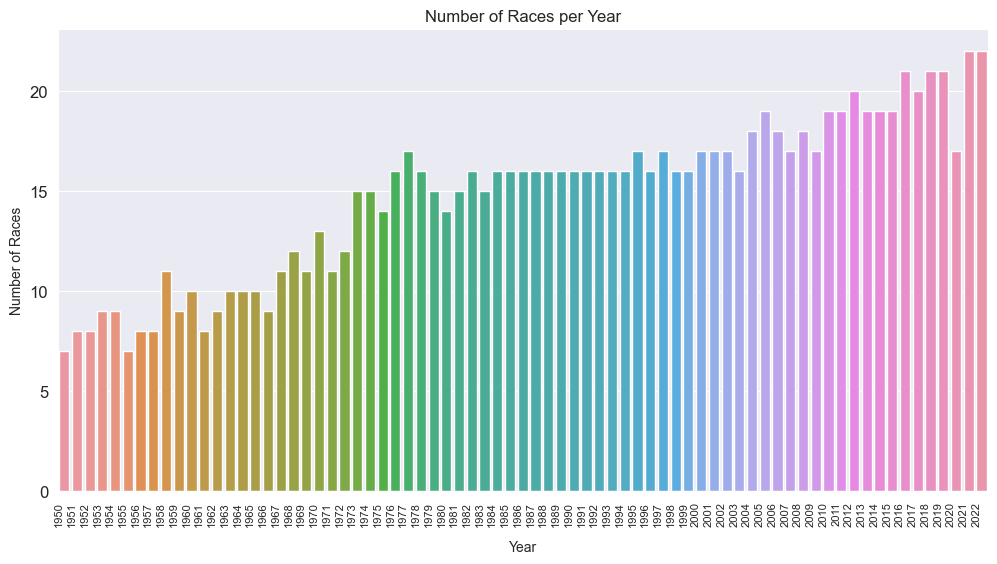

In [42]:

# Create a count plot of the number of races per year
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='season', data=races_df, ax=ax)
sns.set_style("darkgrid")
plt.xlabel('Year', labelpad=10)
plt.ylabel('Number of Races')
plt.title('Number of Races per Year')

# Rotate the x-axis labels and adjust font size
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)



# Adjust the y-axis label font size and spacing between subplots
plt.yticks(fontsize=12)
plt.subplots_adjust(hspace=0.4)

plt.show()

##### Insights

- The above bar plot conveys that each year the number of races conducted has increased.
- In year 2022 - the number of races conducted was 22 
- 2020 - number of races were only 16 - the reason is because of the impact from Covid

#### Analyzing driver_standing.csv

In [43]:
driverstandings_df = pd.read_csv('/Users/jominmathew/Desktop/Formula_one_data/driver_standings.csv')
driverstandings_df.head()

,season,round,race,date,driver,points,wins
0,1950,1,British Grand Prix,1950-05-13,Nino Farina,9.0,1
1,1950,1,British Grand Prix,1950-05-13,Luigi Fagioli,6.0,0
2,1950,1,British Grand Prix,1950-05-13,Reg Parnell,4.0,0
3,1950,1,British Grand Prix,1950-05-13,Yves Cabantous,3.0,0
4,1950,1,British Grand Prix,1950-05-13,Louis Rosier,2.0,0


#### Checking Missing value

In [60]:
driverstandings_df.isna().sum()

season    0
round     0
race      0
date      0
driver    0
points    0
wins      0
dtype: int64

- check duplicate values

In [65]:
driverstandings_df.duplicated().sum()

0

- check data information

In [82]:
driverstandings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27580 entries, 0 to 27579
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  27580 non-null  int64  
 1   round   27580 non-null  int64  
 2   race    27580 non-null  object 
 3   date    27580 non-null  object 
 4   driver  27580 non-null  object 
 5   points  27580 non-null  float64
 6   wins    27580 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.5+ MB


check number of unique values

In [83]:
driverstandings_df.nunique()

season      73
round       22
race        53
date      1079
driver     640
points     418
wins        16
dtype: int64

In [125]:
best_driver = driverstandings_df.groupby('driver')['points'].sum().reset_index()
best_driver= best_driver.sort_values('points',ascending=False).head(30)
best_driver

,driver,points
378,Lewis Hamilton,45612.5
570,Sebastian Vettel,32026.0
184,Fernando Alonso,20602.0
417,Max Verstappen,20548.5
617,Valtteri Bottas,19405.0
366,Kimi Räikkönen,19069.0
450,Nico Rosberg,16910.0
421,Michael Schumacher,14514.0
124,Daniel Ricciardo,13626.0
573,Sergio Pérez,12437.0


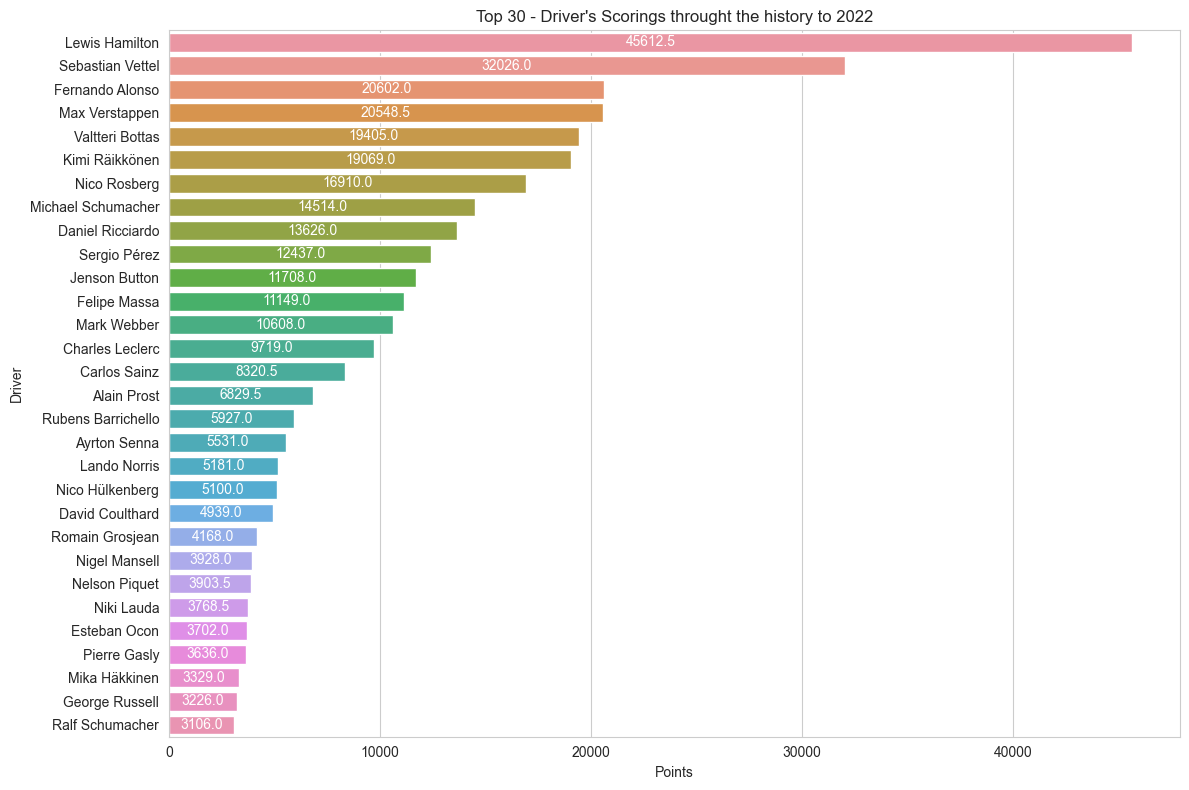

In [130]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))

barplot = sns.barplot(data=best_driver, x="points", y="driver")

plt.title("Top 30 - Driver's Scorings throught the history to 2022")
plt.xlabel("Points")
plt.ylabel("Driver")
# Add labels with point values within the bars
for i in range(len(best_driver)):
      x = best_driver.iloc[i]['points'] / 2 # midpoint of x-axis
      y = i # position on y-axis
      barplot.text(x, y, best_driver.iloc[i]['points'], color='white', ha="center", va="center")

plt.tight_layout() 
plt.show()

#### Analyzing constructor standings


In [48]:
constructorstandings_df = pd.read_csv('/Users/jominmathew/Desktop/Formula_one_data/constructor_standings.csv')
constructorstandings_df.head()

,season,round,constructor,constructor_points,constructor_wins,constructor_standing_position
0,1958,1,cooper,8.0,1,1
1,1958,1,ferrari,6.0,0,2
2,1958,1,maserati,3.0,0,3
3,1958,2,cooper,16.0,2,1
4,1958,2,ferrari,12.0,0,2


#### Analyzing Qualifying Results

In [45]:
qualifying_results_df = pd.read_csv('/Users/jominmathew/Desktop/Formula_one_data/qualifying_results.csv')
qualifying_results_df.head()

,grid,driver_name,car,Laps,Time/Retired,PTS,season,round,qualifying_time
0,1,Nino Farina FAR,Alfa Romeo,70.0,2:13:23.600,9.0,1950,1,NaN
1,2,Luigi Fagioli FAG,Alfa Romeo,70.0,+2.600s,6.0,1950,1,NaN
2,3,Reg Parnell PAR,Alfa Romeo,70.0,+52.000s,4.0,1950,1,NaN
3,4,Yves Giraud-Cabantous GIR,Talbot-Lago,68.0,+2 laps,3.0,1950,1,NaN
4,5,Louis Rosier ROS,Talbot-Lago,68.0,+2 laps,2.0,1950,1,NaN


#### Analyzing results of Driver_Standings

In [46]:
results_driverstandings_df = pd.read_csv('/Users/jominmathew/Desktop/Formula_one_data/results_driverstandings.csv')
results_driverstandings_df.head()

,season,round,circuit_id,driver,dob,nationality,constructor,grid,time,status,points,podium
0,1950,1,silverstone,farina,1906-10-30,Italian,alfa,1,NaN,Finished,9.0,1
1,1950,1,silverstone,fagioli,1898-06-09,Italian,alfa,2,NaN,Finished,6.0,2
2,1950,1,silverstone,reg_parnell,1911-07-02,British,alfa,4,NaN,Finished,4.0,3
3,1950,1,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4
4,1950,1,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5


#### Analyzing Weather Data

In [47]:
weather_info_df = pd.read_csv('/Users/jominmathew/Desktop/Formula_one_data/weather_info.csv')
weather_info_df.head()

,season,Round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1950,1,silverstone,"Sunny, mild, dry.",0,0,0,0,0
1,1950,2,monaco,not found,0,0,0,0,0
2,1950,3,indianapolis,Rainy,0,0,0,1,0
3,1950,4,bremgarten,"Warm, dry and sunny",1,0,1,0,0
4,1950,5,spa,"Warm, dry and sunny",1,0,1,0,0
